# Сводные таблицы

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'date': ['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'], 
                   'category': ['Авто', 'Дача', 'Дача', 'Авто', 'Дача'],
                   'cost': [100, 200, 300, 400, 500]})
df

,date,category,cost
0,2021-01-01,Авто,100
1,2021-01-01,Дача,200
2,2021-01-01,Дача,300
3,2021-01-02,Авто,400
4,2021-01-02,Дача,500


In [5]:
# статистику продаж по дням
df.groupby('date').agg({'cost': 'sum'})

,cost
date,
2021-01-01,600
2021-01-02,900


In [7]:
# статистику продаж по дням для каждой категории
df.groupby(['date', 'category']).agg({'cost': 'sum'})

cost
date       category      
2021-01-01 Авто       100
           Дача       500
2021-01-02 Авто       400
           Дача       500

In [17]:
pivot = (df
 .pivot_table(index='date', columns='category', values='cost', aggfunc='sum', margins=True)
 .sort_values('All', ascending=False)
)
pivot

category,Авто,Дача,All
date,,,
All,500,1000,1500
2021-01-02,400,500,900
2021-01-01,100,500,600


In [13]:
import seaborn as sns

<AxesSubplot:xlabel='category', ylabel='date'>

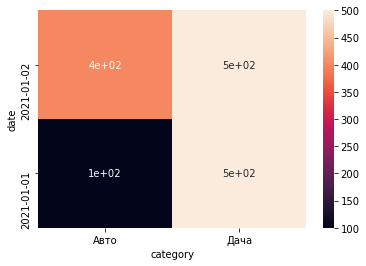

In [15]:
sns.heatmap(pivot, annot=True)

In [19]:
df[(df['date']=='2021-01-01') & (df['category'] == 'Дача')]

,date,category,cost
1,2021-01-01,Дача,200
2,2021-01-01,Дача,300


In [20]:
df[df['category'] == 'Авто']

,date,category,cost
0,2021-01-01,Авто,100
3,2021-01-02,Авто,400


In [18]:
pivot = (df
 .pivot_table(index='date', columns='category', values='cost', 
              aggfunc=lambda x: x.max()-x.min(), margins=True)
 .sort_values('All', ascending=False)
)
pivot

category,Авто,Дача,All
date,,,
All,300,300,400
2021-01-01,0,100,200
2021-01-02,0,0,100


# Вопрос 1
Объединение датафреймов по разным столбцам

In [21]:
import pandas as pd

In [22]:
df_1 = pd.DataFrame({'date_left': ['2021-01-01'], 'value_left': [100]})
df_1

,date_left,value_left
0,2021-01-01,100


In [23]:
df_2 = pd.DataFrame({'date_right': ['2021-01-01', '2022-02-01'], 'value_right': [200, 300]})
df_2

,date_right,value_right
0,2021-01-01,200
1,2022-02-01,300


In [24]:
df_1.merge(df_2, left_on='date_left', right_on='date_right', how='left')

,date_left,value_left,date_right,value_right
0,2021-01-01,100,2021-01-01,200


# Вопрос 2
Объединение нескольких датафреймов

In [25]:
df_3 = pd.DataFrame({'date_3': ['2021-01-01', '2022-02-01'], 'value_3': [400, 500]})
df_3

,date_3,value_3
0,2021-01-01,400
1,2022-02-01,500


In [26]:
# вариант 1
(df_1
 .merge(df_2, left_on='date_left', right_on='date_right')
 .merge(df_3, left_on='date_left', right_on='date_3')  # комментарий
)


,date_left,value_left,date_right,value_right,date_3,value_3
0,2021-01-01,100,2021-01-01,200,2021-01-01,400


In [27]:
# вариант 2
from functools import reduce

df_1 = pd.DataFrame({'date': ['2021-01-01'], 'value_1': [100]})
df_2 = pd.DataFrame({'date': ['2021-01-01'], 'value_2': [200]})
df_3 = pd.DataFrame({'date': ['2021-01-01'], 'value_3': [300]})

In [28]:
data = [1, 2, 3, 4]

In [30]:
first_value = data[0]

for i in data[1:]:
    first_value = first_value * i
    
print(first_value)

24


In [32]:
# шаг 1
a = 1
b = 2
a * b

2

In [33]:
# шаг 2
a = 2
b = 3
a * b

6

In [34]:
# шаг 3
a = 6
b = 4
a * b

24

In [31]:
reduce(lambda a, b: a * b, data)

24

In [35]:
reduce(lambda a, b: a.merge(b, how='left', on='date'), [df_1, df_2, df_3])

,date,value_1,value_2,value_3
0,2021-01-01,100,200,300


# Задача про LEFT JOIN
- Есть таблица left_table из 100 строк
- Объединяем ее с right_table через LEFT JOIN
- Сколько строк может быть на выходе?

- left_table --> N строк
- right_table --> M строк
- на выходе может быть от N до NxM строк

In [36]:
import pandas as pd

In [37]:
left_table = pd.DataFrame({'date': ['2021-01-01'], 'value_left': [100]})
left_table

,date,value_left
0,2021-01-01,100


In [41]:
right_table = pd.DataFrame({'date': ['2021-01-01', '2021-01-02', '2021-01-01'], 
                            'value_right': [200, 300, 500]})
right_table

,date,value_right
0,2021-01-01,200
1,2021-01-02,300
2,2021-01-01,500


In [42]:
left_table.merge(right_table, on='date', how='left')

,date,value_left,value_right
0,2021-01-01,100,200
1,2021-01-01,100,500


In [40]:
left_table.merge(right_table, on='date', how='right')

,date,value_left,value_right
0,2021-01-01,100.0,200
1,2021-01-02,NaN,300


### Пример посложнее

In [43]:
left_table = pd.DataFrame({'date': ['2021-01-01', '2021-01-01'], 'value': [100, 150]})
left_table

,date,value
0,2021-01-01,100
1,2021-01-01,150


In [44]:
right_table = pd.DataFrame({'date': ['2021-01-01', '2021-01-01'], 'value_right': [200, 400]})
right_table

,date,value_right
0,2021-01-01,200
1,2021-01-01,400


In [45]:
left_table.merge(right_table, on='date', how='left')

,date,value,value_right
0,2021-01-01,100,200
1,2021-01-01,100,400
2,2021-01-01,150,200
3,2021-01-01,150,400


Поиск дубликатов

In [46]:
join = left_table.merge(right_table, on='date', how='left')
join

,date,value,value_right
0,2021-01-01,100,200
1,2021-01-01,100,400
2,2021-01-01,150,200
3,2021-01-01,150,400


In [48]:
join.duplicated('date')  # возвращает True, если строка является дубликатом одной из предыдущих

0    False
1     True
2     True
3     True
dtype: bool

In [49]:
join.duplicated(['date', 'value'])

0    False
1     True
2    False
3     True
dtype: bool

In [47]:
# полные дубликаты строк

join[join.duplicated()]

,date,value,value_right


In [52]:
# дубликаты по столбцу (набору столбцов)

join[join.duplicated(['date', 'value'])]

,date,value,value_right
1,2021-01-01,100,400
3,2021-01-01,150,400


In [54]:
# удаление дубликатов
join.drop_duplicates(['date', 'value'], keep='last')

,date,value,value_right
1,2021-01-01,100,400
3,2021-01-01,150,400


### CROSS JOIN
Каждый с каждым

In [55]:
df_names = pd.DataFrame({'names': ['Лена', 'Настя', 'Витя']})
df_names

,names
0,Лена
1,Настя
2,Витя


In [56]:
df_dates = pd.DataFrame({'names': ['2021-01-01', '2021-01-02', '2021-01-03']})
df_dates

,names
0,2021-01-01
1,2021-01-02
2,2021-01-03


In [57]:
df_names.merge(df_dates, how='cross')

,names_x,names_y
0,Лена,2021-01-01
1,Лена,2021-01-02
2,Лена,2021-01-03
3,Настя,2021-01-01
4,Настя,2021-01-02
5,Настя,2021-01-03
6,Витя,2021-01-01
7,Витя,2021-01-02
8,Витя,2021-01-03


In [58]:
df_names['fake'] = True
df_names

,names,fake
0,Лена,True
1,Настя,True
2,Витя,True


In [59]:
df_dates['fake'] = True
df_dates

,names,fake
0,2021-01-01,True
1,2021-01-02,True
2,2021-01-03,True


In [60]:
df_names.merge(df_dates, on='fake', how='left', suffixes=['_names', '_dates'])

,names_names,fake,names_dates
0,Лена,True,2021-01-01
1,Лена,True,2021-01-02
2,Лена,True,2021-01-03
3,Настя,True,2021-01-01
4,Настя,True,2021-01-02
5,Настя,True,2021-01-03
6,Витя,True,2021-01-01
7,Витя,True,2021-01-02
8,Витя,True,2021-01-03


# Задачка с собеседований
Для каждого номера счета и даты посчитать разницу доходов и расходов

In [61]:
import pandas as pd
import sqlite3  # MySQL - pymysql, Postgres - psycopg2

In [ ]:
con = sqlite3.connect('finance.db')  # host port user password
con

In [62]:
# еще один вариант через sqlalchemy

from sqlalchemy import create_engine

In [63]:
con = create_engine(
    "sqlite:///finance.db",
)

In [64]:
debit = pd.read_sql("""
    select date, account, value from debit
    """, con)
debit

,date,account,value
0,2021-01-01,111,100
1,2021-01-01,222,200
2,2021-01-01,111,110
3,2021-01-02,111,90
4,2021-01-03,111,90


In [65]:
credit = pd.read_sql("""
    select date, account, value from credit
    """, con)
credit

,date,account,value
0,2021-01-01,111,50
1,2021-01-01,222,100
2,2021-01-01,111,55
3,2021-01-02,111,45


### Ошибочное объединение

### Подвох №1
- Если ничего не сказано про дубликаты, то считайте, что они есть.
- (в реальных проектах) Если сказано, что их нет, проверьте (!!!).

In [67]:
debit.groupby(['date', 'account']).count()

value
date       account       
2021-01-01 111          2
           222          1
2021-01-02 111          1
2021-01-03 111          1

In [66]:
debit.merge(credit, how='left', on=['date', 'account'])

,date,account,value_x,value_y
0,2021-01-01,111,100,50.0
1,2021-01-01,111,100,55.0
2,2021-01-01,222,200,100.0
3,2021-01-01,111,110,50.0
4,2021-01-01,111,110,55.0
5,2021-01-02,111,90,45.0
6,2021-01-03,111,90,NaN


In [ ]:
pd.read_sql("""
    select d.date, d.account, d.value, c.value from debit d
    left join credit c
    on d.date=c.date and d.account = c.account
    """, con)

### Добавляем группировку

In [68]:
debit_grouped = debit.groupby(['date', 'account']).sum().reset_index()
debit_grouped

,date,account,value
0,2021-01-01,111,210
1,2021-01-01,222,200
2,2021-01-02,111,90
3,2021-01-03,111,90


In [69]:
credit_grouped = credit.groupby(['date', 'account']).sum().reset_index()
credit_grouped

,date,account,value
0,2021-01-01,111,105
1,2021-01-01,222,100
2,2021-01-02,111,45


### Подвох №2
Обязательно укажите параметр how и обоснуйте его (!!!)
- Ваш собеседующий точно не помнит какое значение по умолчанию.
- Ваши коллеги тоже будут это спрашивать.

In [74]:
credit_grouped.merge(debit_grouped, how='outer', on=['date', 'account'])

,date,account,value_x,value_y
0,2021-01-01,111,105.0,210
1,2021-01-01,222,100.0,200
2,2021-01-02,111,45.0,90
3,2021-01-03,111,NaN,90


In [72]:
?credit_grouped.join

In [70]:
credit_grouped.merge(debit_grouped, on=['date', 'account'])

,date,account,value_x,value_y
0,2021-01-01,111,105,210
1,2021-01-01,222,100,200
2,2021-01-02,111,45,90


In [ ]:
credit_grouped.merge(debit_grouped, how='outer', on=['date', 'account'])

In [ ]:
pd.read_sql("""
    select d.date, d.account, d.value from (
        select date, account, sum(value) as value
        from debit
        group by date, account
    ) d
    """, con)

In [ ]:
pd.read_sql("""
    select c.date, c.account, c.value from (
        select date, account, sum(value) as value
        from credit
        group by date, account
    ) c
    """, con)

In [ ]:
pd.read_sql("""
    select d.date, d.account, d.value from (
        select date, account, sum(value) as value
        from debit
        group by date, account
    ) d
    
    left outer join
    
    (select c.date, c.account, c.value from (
        select date, account, sum(value) as value
        from credit
        group by date, account
    ) c) c_2
    
    on d.date=c_2.date and d.account=c_2.account
    """, con)

### Вариант получше через UNION

In [75]:
credit['value'] = -credit['value']
credit

,date,account,value
0,2021-01-01,111,-50
1,2021-01-01,222,-100
2,2021-01-01,111,-55
3,2021-01-02,111,-45


In [76]:
pd.concat([debit, credit])

,date,account,value
0,2021-01-01,111,100
1,2021-01-01,222,200
2,2021-01-01,111,110
3,2021-01-02,111,90
4,2021-01-03,111,90
0,2021-01-01,111,-50
1,2021-01-01,222,-100
2,2021-01-01,111,-55
3,2021-01-02,111,-45


In [77]:
pd.concat([debit, credit]).groupby(['date', 'account']).sum()

value
date       account       
2021-01-01 111        105
           222        100
2021-01-02 111         45
2021-01-03 111         90

In [ ]:
pd.read_sql(""" 
    select date, account, sum(value) from (
        select date, account, value
        from debit

        union all

        select date, account, -value
        from credit
    )
    group by date, account
    """, con)

# Простая база данных

Запись датафрейма в базу данных

In [ ]:
import pandas as pd
import sqlite3

In [78]:
df = pd.read_csv('keywords.csv')
df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [79]:
con = sqlite3.connect('keywords.db')

In [80]:
df.to_sql('keywords', con, if_exists='replace')

100000

Чтение из базы

In [ ]:
con = sqlite3.connect('keywords.db')

In [81]:
pd.read_sql('select * from keywords limit 5', con)

,index,keyword,shows
0,0,вк,64292779
1,1,одноклассники,63810309
2,2,порно,41747114
3,3,ютуб,39995567
4,4,вконтакте,21014195


In [82]:
df_sql = pd.read_sql('select * from keywords where keyword like "%вконтакте%";', con)
df_sql

,index,keyword,shows
0,4,вконтакте,21014195
1,14,вконтакте моя страница,5971451
2,317,вконтакте вход на страницу,488442
3,530,моя страница вконтакте,5971451
4,896,вконтакте социальная сеть,202480
...,...,...,...
84,96819,оренбург онлайн вконтакте,3894
85,97029,раскрутка групп в вконтакте,3782
86,98809,весь арзамас вконтакте,3623
87,99696,моя страница вконтакте одноклассники,16548


Построчная обработка

In [83]:
cur = con.cursor()  # в MySQL есть разные типы курсоров (типа SSDictCursor)

In [84]:
# Умеет отправлять запросы по созданию и редактированию таблиц
cur.execute('select * from keywords where keyword like "%вконтакте%";')

In [ ]:
f = open('...')
f.readline()

for line in f:

In [85]:
line = cur.fetchone()  # fetchall() fetchmany()
line

(4, 'вконтакте', 21014195)

In [86]:
another_line = cur.fetchone()
another_line

(14, 'вконтакте моя страница', 5971451)

In [87]:
for i, line in enumerate(cur.execute('select * from keywords where keyword like "%вконтакте%";')):
    print(i, line)
    
    if i > 5:
        break

0 (4, 'вконтакте', 21014195)
1 (14, 'вконтакте моя страница', 5971451)
2 (317, 'вконтакте вход на страницу', 488442)
3 (530, 'моя страница вконтакте', 5971451)
4 (896, 'вконтакте социальная сеть', 202480)
5 (1003, 'вконтакте вход', 190587)
6 (1093, 'вконтакте моя', 173001)


In [ ]:
select * from db.table;

# Рекомендации для работы с БД
1. Между вами и БД есть сеть. Не передавайте слишком много данных без надобности.
2. В первых запросах указывать в конце оператор limit 5;
3. Никогда не делайте аналитику на боевых таблицах --> попросите админов сделать вам реплику нужных таблиц.